In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [59]:
#Load some data. We'll use this in a bit. 
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


https://zhuanlan.zhihu.com/p/358223959 一篇文章搞懂logit, logistic和sigmoid的区别

# Logistic Regression


Linear regression allows us to make numerical predictions based on one or more inputs, either numerical or categorical. Logistic regression is the equivalent that allows us to make classfication predictions - predicting if something falls into group A or group B. 

Logistic regression is based on our old friend, the logit, of log ratio fame. We effectively are doing a regression to predict the likelihood of something happening, then categorizing it based on if it is more probable than some cutoff (e.g. 50%). For example, we can calculate the probability that a transaction is fraudulent, then if it is more likely than not to be fraud, we categorize it as such. For now, we'll look at predicting between two classes, but that's not a limit, we can categorize into many classes. 

Logistic regression (and other classification methods) are extremely common. Regression/prediction and classification are the two big pillars of predictive analytics that we will look at through next term. 
# 逻辑回归

线性回归允许我们根据一个或多个输入（数值或分类）进行数值预测。逻辑回归等同于允许我们进行分类预测——预测某物是否属于 A 组或 B 组。

Logistic 回归是基于我们的老朋友 logit，log ratio 的名声。我们实际上是在进行回归以预测某事发生的可能性，然后根据它是否比某个截止值（例如 50%）更有可能对其进行分类。例如，我们可以计算一笔交易是欺诈的概率，如果它是欺诈的可能性比不是欺诈的可能性大，我们就将其归类为欺诈。现在，我们将研究两个类别之间的预测，但这不是限制，我们可以分为许多类别。

逻辑回归（和其他分类方法）非常普遍。回归/预测和分类是我们将在下学期研究的预测分析的两大支柱。

## The Classification Problem

Dealing with classification is a little different than regression, because now we are not looking to predict a value, we are looking to predic a class - or phrased alternatively, we are looking to divide two (or more) sets of data.  

If we plot a simple 2 varaible problem, just like we did in linear regression, we'll get something that looks like this:
<ul>
<li> Suppose that BMI is our X and Outcome (do you have diabetes?) is the Y. 
<li> Plot that on a scatter plot. 
<li> Our goal is to use X to predict Y, just as it was in linear regression. 
<li> However, there's not a very obvious way to use the X value only to do a linear regression that has any degree of accuracy.
    <ul>
    <li> Seriously, try to generate any line of best fit that doesn't have massive residuals. 
    </ul>
</ul>
## 分类问题

处理分类与回归略有不同，因为现在我们不是要预测一个值，而是要预测一个类——或者换句话说，我们要划分两个（或更多）数据集。

如果我们绘制一个简单的 2 变量问题，就像我们在线性回归中所做的那样，我们将得到如下所示的结果：
<ul>
<li> 假设 BMI 是我们的 X，结果（你有糖尿病吗？）是 Y。
<li> 将其绘制在散点图上。
<li> 我们的目标是使用 X 来预测 Y，就像在线性回归中一样。
<li> 但是，没有一种非常明显的方法可以仅使用 X 值来执行具有任何准确度的线性回归。
    <ul>
    <li> 说真的，尝试生成任何没有大量残差的最佳拟合线。
    </ul>
</ul>

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

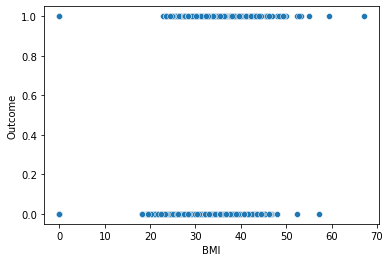

In [60]:
sns.scatterplot(data=df, x="BMI", y="Outcome")

#### So What Do We Do?
We need something that can transform our simple linear fitting into something... else. 

＃＃＃＃ 那么我们该怎么办？
我们需要一些可以将我们简单的线性拟合转换成其他东西的东西。

### Remember the Logit?

Recall from the probability stuff, we also calculated odds - or the ratio of something happening to it not happening. Odds are just an alternative expression of probability. E.g. if we are 30% likely to win a price, p = .3. We generally treat classification as splitting our data into 1 and 0, or true and not true, so the odds of the "other option" are allways just 1-odds. We can classfy into multiple categories (e.g. predict hair color as blonde, red, black, brown), the same ideas apply - we will examine this more next semester, for now it is all yes/no. If we translate that to odds:

$ Odds = \frac{.3}{(1-.3)} = \frac{p}{(1-p)} = o $

If we then take the log of that (remember, taking the log of the odds made things work), we end up with:

$ log(odds) = log(\frac{p}{(1-p)}) = log(\frac{p}{not p}) = log(\frac{prob(1)}{prob(0)}) $ (we can have two outcomes here - 1 or 0, so the probabilities are for either of those two happening)

In logistic regression, we use the standard form:

$ log(odds) = m*x + b $

So, we are able to predict the log odds using the same linear regression format that we are used to. Thanks log odds! 
### 还记得 Logit 吗？

回想一下概率，我们还计算了几率——或者某事发生与未发生的比率。赔率只是概率的另一种表达方式。例如。如果我们有 30% 的可能性赢得价格，则 p = .3。我们通常将分类视为将我们的数据分为 1 和 0，或者为真和不为真，因此“其他选项”的几率总是只有 1 的几率。我们可以分为多个类别（例如，预测头发颜色为金色、红色、黑色、棕色），同样的想法也适用——我们将在下学期对此进行更多研究，目前都是是/否。如果我们将其转化为赔率：

$ 赔率 = \frac{.3}{(1-.3)} = \frac{p}{(1-p)} = o $

如果我们然后对它进行记录（记住，对赔率进行记录使事情可行），我们最终得到：

$ log(odds) = log(\frac{p}{(1-p)}) = log(\frac{p}{not p}) = log(\frac{prob(1)}{prob(0) }) $（这里我们可以有两个结果——1 或 0，所以概率是这两个发生的任何一个）

在逻辑回归中，我们使用标准形式：

$ log(赔率) = m*x + b $

因此，我们能够使用我们习惯的相同线性回归格式来预测对数几率。感谢日志赔率！

#### Full Math

![Logistic 1](images/logit_math_1.jpeg "Logistic 1")
![Logistic 2](images/logit_math_2.jpeg "Logistic 2")

## Enter the Sigmoid

We end up here with a function called the sigmoid, which is what gives us our actual predictions. The sigmoid has the useful property that it "jumps" from 0 to 1 very quickly and never goes past those bounds. 

![Sigmoid](images/sigmoid.png "Sigmoid")

What this all means is that we can calculate the probability - which is the output of the sigmoid - then just draw a cutoff to label our prediction as 1 or 0. 

![Classification](images/sig_prob.png "Classification")

Since the sigmoid is so "steep", it tends to do a good job of separating - small changes in the input, while the values are near the transition part of the curve, yeild large changes in the prediction. 

<b>Note:</b> we don't need to derive this or manually calculate it, we mainly just want to understand the concept. 
#### 全数学

![后勤 1](images/logit_math_1.jpeg "后勤 1")
![后勤 2](images/logit_math_2.jpeg "后勤 2")

## 输入 Sigmoid

我们在这里结束了一个叫做 sigmoid 的函数，它给了我们实际的预测。 sigmoid 有一个有用的属性，它可以非常快速地从 0 跳到 1，并且永远不会超过这些界限。

![Sigmoid](images/sigmoid.png "Sigmoid")

这一切意味着我们可以计算概率——这是 sigmoid 的输出——然后画一个截止点来将我们的预测标记为 1 或 0。

![分类](images/sig_prob.png "分类")

由于 sigmoid 非常“陡峭”，它倾向于很好地分离 - 输入中的小变化，而值接近曲线的过渡部分，预测中产生大的变化。

<b>注意：</b>我们不需要推导或手动计算它，我们主要只是想了解这个概念。

## Walkthrough Example

Simple example... We want to predict Y, given some values of X. For this, we can say that the values are as follows:

<ul>
<li> Y = Passed high school. 1 = Yes.
<li> X1 = Attended class. 1 = Yes.
<li> X2 = Studied at home. 1 = Yes. 
</ul>

Each set of values (a column) is one person, so we have two people who passed and two who did not. The details of the data don't matter much, we're looking at the mechanics here. We'll do a real one in a min. This middle part of the curve is sometimes called the Decision Boundary. 
## 演练示例

简单的例子......我们想要预测 Y，给定一些 X 的值。为此，我们可以说这些值如下：

<ul>
<li> Y = 高中毕业。 1 = 是。
<li> X1 = 已上课。 1 = 是。
<li> X2 = 在家学习。 1 = 是。
</ul>

每组值（一列）代表一个人，所以我们有两个人通过了，两个人没有通过。数据的细节并不重要，我们在这里查看机制。我们会在一分钟内做一个真正的。曲线的中间部分有时称为决策边界。

In [61]:
#Data
y = np.array([0, 1, 0, 1])
x1 = np.array([0, 0, 0, 1])
x2 = np.array([0, 1, 1, 1])

We can do a regression, using the logit formula:

$\log o = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $

We don't know our coefficients though - the process for determining them isn't a direct calculation like linear regression. Here we need to try some, check our error, then improve. (This is a common thing in ML).

For this, we are making an arbitrary guess. 
我们可以使用 logit 公式进行回归：

$\log o = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $

虽然我们不知道我们的系数——确定它们的过程不是像线性回归那样的直接计算。这里我们需要尝试一些，检查我们的错误，然后改进。 （这在 ML 中很常见）。

为此，我们进行了任意猜测。

In [62]:
b = [-1.5, 2.8, 1.1]

Now, we can calculate it out, just like a linear regression. 

现在，我们可以计算出来，就像线性回归一样。

In [63]:
log_odds_0=-1.5+2.8*0+1.1*0

In [64]:
log_o = b[0] + b[1] * x1 + b[2] * x2
log_o

array([-1.5, -0.4, -0.4,  2.4])

Now, convert log odds to odds

In [65]:
o = np.exp(log_o)
o

array([ 0.22313016,  0.67032005,  0.67032005, 11.02317638])

Now, convert odds to probabilities. These probabilities are the outputs of the sigmoid calculation, and we can use them to classify by just labeling things that are over the cutoff (usually .5) as 1s and the things that are under as 0. 
现在，将赔率转换为概率。这些概率是 sigmoid 计算的输出，我们可以使用它们进行分类，只需将超过截止值（通常为 .5）的事物标记为 1，将低于截止值的事物标记为 0。

In [66]:
p = o / (o+1)
p

array([0.18242552, 0.40131234, 0.40131234, 0.9168273 ])

#### In Real Usage

Those are all the predicted probabilities of each person passing high school. 

Now, a little weirdness. We started out this whole thing with some pretty random values for all the coefficients, so why would we trust these predictions? Well, right now, we wouldn't. What we need to do to make a model that is actually accurate is to check how well we did now, then make some improvements. 

To check how well we did now, we can calculate how close the probabilites are to the real values. E.g. Person #4 did really graduate, and our model predicted a ~92% chance of them graduating, that's good. Person #2 also graduated, but our model only predicted a ~40% chance of them graduating, that's bad. So our metric for evaluating is that we want our predictions to be as close as possible to the real values - or we want "1"s to have high percentages, and "0"s to have low percentages. The more sharpely we can discriminate between passes and fails, the more accurate the model. 

We can calculate this overall accuracy pretty simply - how likely are we to predict the correct answer? 
#### 实际使用

这些都是每个人通过高中的预测概率。

现在，有点奇怪。我们从所有系数的一些非常随机的值开始了整个事情，那么我们为什么要相信这些预测呢？好吧，现在，我们不会。要制作一个真正准确的模型，我们需要做的是检查我们现在做得有多好，然后进行一些改进。

为了检查我们现在做得有多好，我们可以计算概率与真实值的接近程度。例如。第 4 个人确实毕业了，我们的模型预测他们毕业的几率约为 92%，这很好。人 #2 也毕业了，但我们的模型只预测了他们毕业的大约 40% 的机会，这很糟糕。所以我们的评估指标是我们希望我们的预测尽可能接近真实值——或者我们希望“1”的百分比高，“0”的百分比低。我们越能区分通过和失败，模型就越准确。

我们可以非常简单地计算这个整体准确率——我们预测正确答案的可能性有多大？

### Cost and Loss

Some new concpets that are introduced here, and are important going forward, are the ideas of cost and loss. When doing these types of iteritive training processes our progress is tracked by our loss, or the amount of error. This amount is calculated by our loss function, or how that error is calculated. This is directly comparable to the MSE/RMSE process we looked at previously, we have some calculation to determine our overall accuracy. 

Each time we do an iteration, we get some amount of error, or loss. The best solution is where this loss is at it's lowest. This is the same idea as how the best linear regression model is best when the loss - the linear least squares distance - is at it's lowest. 

<b>Note:</b> the terms cost and loss are often used interchangably, and this is generally fine. Technically the loss function is for each specific example, and the cost is the overall summary. In practice, it is not that big of a deal to swap the terms - there won't really be many, if any, scenarios in which that will be confusing. 
### 成本和损失

这里介绍的一些新概念对未来很重要，它们是成本和损失的概念。在进行这些类型的迭代训练过程时，我们的进度由我们的损失或错误量来跟踪。这个数量是通过我们的损失函数计算的，或者是如何计算误差的。这与我们之前查看的 MSE/RMSE 过程直接相当，我们有一些计算来确定我们的整体准确性。

每次我们进行迭代时，我们都会得到一些错误或损失。最好的解决方案是这种损失最低的地方。这与当损失 - 线性最小二乘距离 - 最低时最佳线性回归模型的最佳状态相同。

<b>注意：</b>成本和损失这两个术语经常可以互换使用，这通常没有问题。从技术上讲，损失函数是针对每个特定示例的，而成本是总体摘要。实际上，交换术语并没有什么大不了的——实际上不会有很多（如果有的话）混淆的场景。

### Gradient Descent

Gradient descent is the way that many algorithms try to minimize their loss. In short, this process is just:
<ul>
<li> Create a model. 
<li> Measure the loss. 
<li> Adjust the model's values (i.e. the slopes and intercepts here)
<li> Check the loss again. 
<li> Repeat until you reach the lowest value for loss. (i.e. the most accurate model)
</ul>

![Gradient](images/grad_desc.png "Gradient")

The algorithm "knows which way to go" in adjusting the weights between each trial via some calculus and matrix math that we will peek into when we look at neural networks. The algorithm can basically use partial derivitives to attribute error to the different values (the slopes), as well as if they are too high or too low. Each step moves these values a little, then we recheck. 

We will explore the details of gradient descent much more as we get into the machine learning stuff, for now understanding the general idea is good enough. This process is how most machine learning models "learn", and this is what is going on when they are processing for a long time. Each iteration moves the results (hopefully) to a point where the model has a little less error, and eventually we either "find the bottom" - which in logistic regression is the slopes and intercept values for the log-odds regression above, or we hit a limit of iterations. 

＃＃＃ 梯度下降

梯度下降是许多算法试图最小化损失的方法。简而言之，这个过程就是：
<ul>
<li> 创建模型。
<li> 测量损失。
<li> 调整模型的值（即这里的斜率和截距）
<li> 再次检查损失。
<li> 重复直到达到最低损失值。 （即最准确的模型）
</ul>

![渐变](images/grad_desc.png "渐变")

该算法通过一些微积分和矩阵数学来调整每次试验之间的权重，“知道该走哪条路”，我们在研究神经网络时会看到这些。该算法基本上可以使用偏导数将误差归因于不同的值（斜率），以及它们是否太高或太低。每一步都会稍微移动这些值，然后我们重新检查。

当我们进入机器学习的东西时，我们将更多地探索梯度下降的细节，现在理解一般的想法就足够了。这个过程是大多数机器学习模型“学习”的方式，这也是它们在长时间处理时发生的情况。每次迭代都会（希望）将结果移动到模型误差较小的点，最终我们要么“找到底部”——在逻辑回归中就是上面对数-几率回归的斜率和截距值，或者我们达到迭代的极限。

##### What is our Loss?

Our loss in the example above is a calculation the summarizes all of our individual errors. In the previous cell we calculated the probability of each person passing (being 1), our original Y data shows us the true probability of each person passing (either 0 or 1). Each prediction has an error of the distance between that true value and our expected probability. 

E.g. for the second item, this person passed, so the real value is 1. We predicted a ~40% likelihood of them passing, so our error there is ~60%. Person 4 passed, we predicted a ~92% chance of them passing, so our error is ~8%. 
##### 我们的损失是多少？

我们在上面的例子中的损失是一个总结了我们所有个人错误的计算。在前面的单元格中，我们计算了每个人通过的概率（为 1），我们的原始 Y 数据向我们显示了每个人通过的真实概率（0 或 1）。每个预测都有一个真实值与我们预期概率之间的距离误差。

例如。对于第二项，这个人通过了，所以实际值为 1。我们预测他们通过的可能性约为 40%，因此我们的误差约为 60%。第 4 个人通过了，我们预测他们通过的概率约为 92%，因此我们的误差为 8%

In [67]:
#likes = np.where(y, p, 1-p)
likes = np.where(y, 1-p, p)
likes

array([0.18242552, 0.59868766, 0.40131234, 0.0831727 ])

##### Loss Function

These individual accuracies can be tallied up, we'll do a simple one with a common loss function called log-loss. There are a bunch of "real" loss functions that we can use, we'll explore them later on in machine learning. The most simple one is also based on the log of the odds, it is called Binary Cross-entropy, or Log-Loss. Don't worry about these details too much now, we will explore this later. 

![Log Loss](images/log_loss.png "Log Loss")

The goal of the algorithm is to find the smallest value for this totalled loss, that's when we are most accurate overall. 

We can turn this loss total into an overall cost by just dividing by n. 
##### 损失函数

可以计算这些单独的准确度，我们将使用一个称为对数损失的常见损失函数来做一个简单的。我们可以使用许多“真正的”损失函数，稍后我们将在机器学习中探索它们。最简单的也是基于几率的对数，叫做二元交叉熵，或者Log-Loss。现在不要太担心这些细节，我们稍后会探讨。

![日志丢失](images/log_loss.png "日志丢失")

该算法的目标是找到这个总损失的最小值，这是我们总体上最准确的时候。

我们只需除以 n 即可将此总损失转化为总成本。

In [68]:
loss_sum = 0
for i in range(len(p)):
    if y[i] == 1:
        loss_sum += -np.log(p[i])
    elif y[i] == 0:
        loss_sum += -np.log(1-p[i])
cost = loss_sum/len(p)
cost

0.42856998373415184

Our overall goal is to find the lowest possibility for this value. The lower this value, the closer to reality our model was predicting, the more accurate we can be. The process is to now to:
<ul>
<li> Take this amount of overall error, use it to make an adjustment to those starting values. (The ones we made up to start)
    <ul>
    <li> This step is something we'll look at in more depth with neural networks. In involves some partial derivitives which (kind of) allow us to work backwards and attribue parts of the errors to the original inputs. 
    </ul>
<li> Calculate the new error with the different starting point. 
<li> Repeat - each stage should move us a little closer to the "true" answer. 
    <ul>
    <li> In other words, we are repeating the process over and over until we've found the solution that minimizes our overal cost/loss (the amount of error). 
    </ul>
</ul>

This process is called Gradient Descent and is something we will care about more in ML class. Basically we define something called a loss function, which measures how much error we have. We then repeat a bunch of trials with different coef values, and measure the loss each time. We keep repeating until we've found the lowest amount of loss - or the smallest amount of error. The math can be complex, but the idea is pretty simple. If we manually changed the array of b values, ran the model, collected the LIKE value, and finally selected the combination with the best LIKE, that'd be a crude version of the same thing. This idea is common later on. Here, sklearn or statsmodels do it for us. 
我们的总体目标是找到该值的最低可能性。这个值越低，我们的模型预测的越接近现实，我们就越准确。现在的过程是：
<ul>
<li> 取这个总误差量，用它来调整那些起始值。 （我们编造的开始）
    <ul>
    <li> 这一步我们将更深入地研究神经网络。 In 涉及一些偏导数，它们（某种程度上）允许我们向后工作并将部分错误归因于原始输入。
    </ul>
<li> 计算不同起点的新误差。
<li> 重复 - 每个阶段都应该让我们更接近“真实”答案。
    <ul>
    <li> 换句话说，我们不断地重复这个过程，直到找到能够最大限度地降低总体成本/损失（错误量）的解决方案。
    </ul>
</ul>

这个过程称为梯度下降，是我们在 ML 课程中会更关心的内容。基本上我们定义了一个叫做损失函数的东西，它衡量我们有多少错误。然后我们用不同的 coef 值重复一系列试验，并测量每次的损失。我们不断重复，直到我们找到最低的损失量 - 或者最小的错误量。数学可能很复杂，但想法很简单。如果我们手动更改 b 值数组，运行模型，收集 LIKE 值，最后选择具有最佳 LIKE 的组合，那将是同一事物的粗略版本。这种想法后来很普遍。在这里，sklearn 或 statsmodels 为我们做这件事。

### The Sigmoid and the Regression

The sigmoid function is a function that takes in inputs (X values) and squishes all the outputs (Y values) between 0 and 1. The sigmoid is also the inverse of the logit function. The function is:

$ g(x) = \frac{1}{(1+e^-x)} = logit^-1 $

A graph of what it ends up looking like is below. (Ignore the red line for now). The important part is now we have a way to connect the probabilities to our sigmoid function. 
### Sigmoid 和回归

sigmoid 函数是一个接受输入（X 值）并将所有输出（Y 值）压缩在 0 和 1 之间的函数。sigmoid 也是 logit 函数的反函数。功能是：

$ g(x) = \frac{1}{(1+e^-x)} = logit^-1 $

下面是它最终看起来的样子的图表。 （暂时忽略红线）。重要的是现在我们有办法将概率连接到我们的 sigmoid 函数。

In [69]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

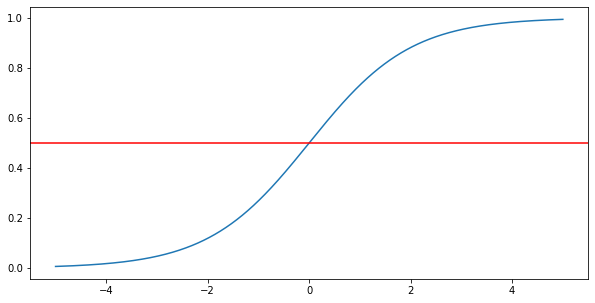

In [70]:
# Creating vectors X and Y
x = np.linspace(-5, 5, 10000)
y = sigmoid(x)
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
# Show the plot
plt.axhline(.5, color="red")
plt.show()

Our logistic regression is going to use this sigmoid functions to generate a prediction between 0 and 1. Can can plug the linear regression equation into the sigmoid function, then our new hypothesis becomes:

$ y = \frac{1}{(1+e^(m*x+b))} $

Where y = probability. 

Note - the mathmatical derivations aren't really super-duper critical. If it is confusing, just ingore it. There's a full derivation and example here: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/
我们的逻辑回归就是要用这个sigmoid函数来产生0到1之间的预测。可以把线性回归方程代入sigmoid函数，那么我们的新假设就变成了：

$ y = \frac{1}{(1+e^(m*x+b))} $

其中 y = 概率。

注意 - 数学推导并不是真正的超级关键。如果它令人困惑，请忽略它。这里有一个完整的推导和例子：https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

<h2>Real Example - SciKitLearn</h2>

For our first try we can use the diabetes example we've used a bit before, though we've always sidesteped the true target. The outcome value is whether or not someone is diabetic, and all the other variables that are risk factors that we can use to predict if someone will become diabetic. Our aim is to predict, yes or no, will someone develop diabetes based on those risk factors. 

First - one variable. We'll use BMI.
<h2>真实示例 - SciKitLearn</h2>

对于我们的第一次尝试，我们可以使用我们之前使用过的糖尿病示例，尽管我们总是回避真正的目标。结果值是某人是否患有糖尿病，以及所有其他变量，这些变量是我们可以用来预测某人是否会患上糖尿病的风险因素。我们的目标是预测，是或否，是否有人会根据这些风险因素患上糖尿病。

第一 - 一个变量。我们将使用 BMI。

In [71]:
y = np.array(df["Outcome"]).reshape(-1,1)
x = np.array(df["BMI"]).reshape(-1,1)
print(x.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

(768, 1) (768, 1)


<b>ravel()</b> - sometimes you may get a message that says something like "we want the y data in the shape (samples,)". This is obviously a contradiction to what we said to always shape the y as (samples, 1). The easiest way to deal with this is to use the .ravel() function as shown below. The cause is the expectation of data format for whatever you're using, which can vary. If we always make the y array (samples, 1) and then use ravel when needed, that allows us to be consistent and not worry about it much. I'd suggest keeping with this for simplicity. 
<b>ravel()</b> - 有时您可能会收到一条消息，内容类似于“我们想要形状为 (samples,) 的 y 数据”。这显然与我们所说的始终将 y 塑造为 (samples, 1) 相矛盾。处理这个问题的最简单方法是使用 .ravel() 函数，如下所示。原因是对您使用的任何数据格式的期望，这可能会有所不同。如果我们总是创建 y 数组 (samples, 1) 然后在需要的时候使用 ravel，那么我们就可以保持一致而不必担心太多。为了简单起见，我建议保持这一点。

In [72]:
md1 = LogisticRegression().fit(X_train,y_train.ravel())
md1Pred = md1.predict(X_test)

score = md1.score(X_test, y_test)
print(score)

0.7125984251968503


66% accuracy. Not bad. We can try with more Xs though...

#### Multiple Logistic Regression

66% 的准确率。不错。不过我们可以尝试使用更多的 X...

#### 多元逻辑回归

In [73]:
#Get all the X values. 
# I can use the y from above still 
#获取所有的X值。
# 我仍然可以使用上面的 y

df2 = df.drop(columns={"Outcome"})
x2 = np.array(df2)
x2.shape

(768, 8)

In [86]:
#I'm reusing some varaible names to make my life easier with copy/paste. 
#Make sure you run things in order if you do this. 
#I 正在重复使用一些可变名称，以便通过复制/粘贴让我的生活更轻松。
#如果执行此操作，请确保按顺序运行。
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.33)

md2 = LogisticRegression().fit(X_train,y_train.ravel())
md2Pred = md2.predict(X_test)
score = md2.score(X_test, y_test)
print(score)

0.7755905511811023


e:\Tools\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


When I ran this the first time, I didn't get an answer, I instead got something along the lines of "failed to converge". This means that the gradient descent process didn't finish, and the algorithm didn't settle on an answer. We will explore this more in the machine learning stuff, for now we can just tell it to set a higher cap on how long it can run. 
当我第一次运行它时，我没有得到答案，而是得到了类似“无法收敛”的信息。这意味着梯度下降过程没有完成，算法也没有确定答案。我们将在机器学习方面对此进行更多探索，现在我们可以告诉它为它可以运行多长时间设置一个更高的上限。

In [75]:
md2 = LogisticRegression(max_iter=1000).fit(X_train,y_train.ravel())
md2Pred = md2.predict(X_test)
score = md2.score(X_test, y_test)
print(score)

0.7637795275590551


### Classification Results 

We can demonstrate some results... We'll look into result details more later. 
### 分类结果

我们可以展示一些结果……我们稍后会详细研究结果。

In [76]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
preds = md2.predict(X_test)

In [77]:
print(classification_report(y_test, preds, digits=2))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       157
           1       0.79      0.52      0.62        97

    accuracy                           0.76       254
   macro avg       0.77      0.72      0.73       254
weighted avg       0.77      0.76      0.75       254



In [78]:
print(confusion_matrix(y_test, preds))

[[144  13]
 [ 47  50]]


<AxesSubplot:>

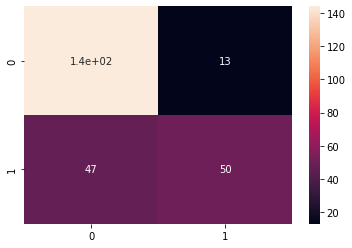

In [79]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True)

In [80]:
print(accuracy_score(y_test, preds)*100)

76.37795275590551


<h1>Work Through Titanic</h1>

Predict who lives...

In [81]:
#Data
dfe = pd.read_csv("data/train.csv")
dfe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
dfe["no_cabin"] = dfe["Cabin"].isnull()
dfe["family"] = dfe["SibSp"] + dfe["Parch"]

I dropped age due to missing values. Think about if there's anything else we may want to do to it instead. 

In [83]:
dfe2 = dfe.drop(columns={"Name", "Ticket", "Cabin", "SibSp", "Parch", "PassengerId", "Age"})
dfe2.head()

,Survived,Pclass,Sex,Fare,Embarked,no_cabin,family
0,0,3,male,7.2500,S,True,1
1,1,1,female,71.2833,C,False,1
2,1,3,female,7.9250,S,True,0
3,1,1,female,53.1000,S,False,1
4,0,3,male,8.0500,S,True,0


In [84]:
#Redo the dummy variables. 
dfe2_dumb = pd.get_dummies(dfe2, drop_first=True)

ye = np.array(dfe2_dumb["Survived"]).reshape(-1,1)
xe = dfe2_dumb.drop(columns={"Survived"})
xe.shape, ye.shape

((891, 7), (891, 1))

In [85]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(xe, ye)

titan = LogisticRegression(max_iter=1000).fit(X_trainT,y_trainT.ravel())
titan_preds = titan.predict(X_testT)
scoreT = titan.score(X_testT, y_testT)
scoreT

0.7892376681614349